In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
data=pd.read_csv('Walmart_Store_sales.csv')

In [53]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [55]:
data['Date']=pd.to_datetime(data['Date'])

In [56]:
data.Date

0      2010-05-02
1      2010-12-02
2      2010-02-19
3      2010-02-26
4      2010-05-03
          ...    
6430   2012-09-28
6431   2012-05-10
6432   2012-12-10
6433   2012-10-19
6434   2012-10-26
Name: Date, Length: 6435, dtype: datetime64[ns]

In [57]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


<AxesSubplot:>

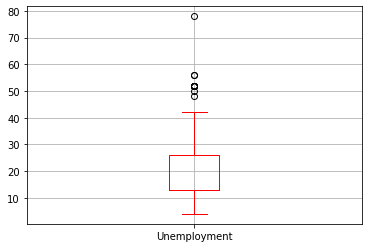

In [62]:
data['Unemployment'].value_counts().plot(kind='box',color="red",grid="yes")

<AxesSubplot:>

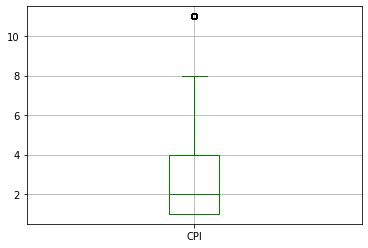

In [63]:
data['CPI'].value_counts().plot(kind='box',color="green",grid="yes")

<AxesSubplot:>

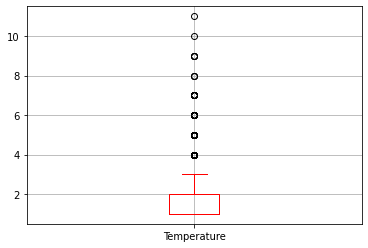

In [64]:
data['Temperature'].value_counts().plot(kind='box',color="red",grid="yes")

<AxesSubplot:>

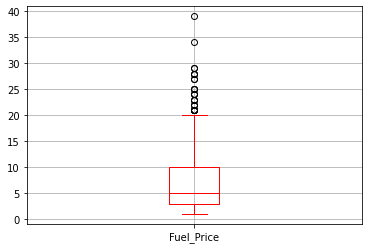

In [65]:
data['Fuel_Price'].value_counts().plot(kind='box',color="red",grid="yes")

<AxesSubplot:>

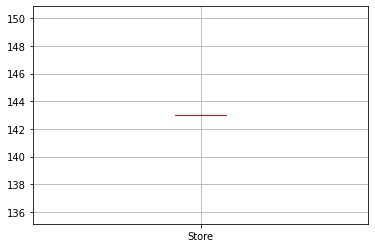

In [67]:
data['Store'].value_counts().plot(kind='box',color="red",grid="yes")

In [8]:
data.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [9]:
df=data.groupby('Store')['Weekly_Sales'].sum().round().sort_values(ascending=False)
df.head(1)


Store
20    301397792.0
Name: Weekly_Sales, dtype: float64

store 20 has got maximum sales

In [10]:
dfs=data.groupby('Store')['Weekly_Sales'].std().round().sort_values(ascending=False)
dfs.head(1)

Store
14    317570.0
Name: Weekly_Sales, dtype: float64

Store 14 has got maximum standard deviation

In [11]:
dfg=pd.DataFrame(dfs)
dfg


,Weekly_Sales
Store,
14,317570.0
10,302262.0
20,275901.0
4,266201.0
13,265507.0
23,249788.0
27,239930.0
2,237684.0
39,217466.0


In [12]:
dfr=dfg.Weekly_Sales
mean_to_std=dfr.std()/dfr.mean()*100

In [13]:
mean_to_std

57.31319188682552

In [14]:
quaterly_2=data[(data['Date']>='2012-04-01')&(data['Date']<='2012-06-01')].groupby('Store')['Weekly_Sales'].sum().round()

In [15]:
quaterly_2

Store
1     12668560.0
2     15182877.0
3      3363691.0
4     17129626.0
5      2700979.0
6     12103096.0
7      4127903.0
8      7256587.0
9      4503094.0
10    14354671.0
11    10751056.0
12     8105634.0
13    16062365.0
14    15031820.0
15     4582054.0
16     3759754.0
17     7957484.0
18     8240853.0
19    10838154.0
20    16345164.0
21     5592049.0
22     7806239.0
23    10615957.0
24    10370334.0
25     5508371.0
26     7784268.0
27    13178462.0
28    10386079.0
29     4131687.0
30     3594000.0
31    11120655.0
32     9320624.0
33     2166087.0
34     7833539.0
35     6255679.0
36     2521686.0
37     4274515.0
38     3521214.0
39    12155310.0
40     7534514.0
41    10516909.0
42     4683489.0
43     5094492.0
44     2631045.0
45     6118624.0
Name: Weekly_Sales, dtype: float64

In [16]:
q3=data[(data['Date']>='2012-07-01')&(data['Date']<='2012-09-30')].groupby('Store')['Weekly_Sales'].sum()
q3
print("Store {} has {} as maximum sales in q32012".format(q3.idxmax(),q3.max()))


Store 4 has 25652119.35 as maximum sales in q32012


In [17]:
q_sales=pd.DataFrame({'Q2':quaterly_2,'Q3':q3,'Diff':q3-quaterly_2,'Growth':(q3-quaterly_2)/(q3*100)}).sort_values(by=['Growth'],ascending=False).head()

In [18]:
q_sales

,Q2,Q3,Diff,Growth
Store,,,,
7,4127903.0,7322393.92,3194490.92,0.004363
16,3759754.0,6441311.11,2681557.11,0.004163
35,6255679.0,10252122.68,3996443.68,0.003898
23,10615957.0,17103654.36,6487697.36,0.003793
26,7784268.0,12417575.35,4633307.35,0.003731


(array([2., 1., 0., 1., 1.]),
 array([0.00373125, 0.00385753, 0.0039838 , 0.00411008, 0.00423636,
        0.00436263]),
 <BarContainer object of 5 artists>)

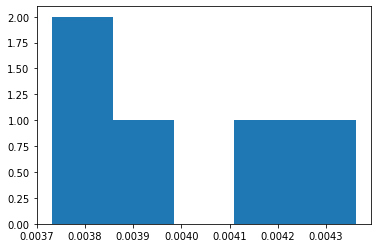

In [19]:
import matplotlib.pyplot as plt
plt.hist(q_sales.Growth,bins=5)

In [20]:
holiday_sales=data[data.Holiday_Flag==1]
nonholiday_sales=data[data.Holiday_Flag==0]
holiday_sales
type(holiday_sales)

pandas.core.frame.DataFrame

In [21]:
SB=['12-02-2010','11-02-2011','10-02-2012','08-02-2013']
store_holiday_sales_superbowl=holiday_sales.loc[holiday_sales.Date.isin(SB)]['Weekly_Sales'].sum()
print("Sales during superbowl",store_holiday_sales_superbowl)
LBD=['10-09-2010','09-09-2011','07-09-2012','06-09-2013']
store_holiday_sales_labourday=holiday_sales.loc[holiday_sales.Date.isin(LBD)]['Weekly_Sales'].sum()
print("Sales during labour day ",store_holiday_sales_labourday)
TD=['26-11-2010','25-11-2011','23-11-2012','29-11-2013']
store_holiday_sales_thanksgiving=holiday_sales.loc[holiday_sales.Date.isin(TD)]['Weekly_Sales'].sum()
print("Sales during thanksgiving",store_holiday_sales_thanksgiving)
CS=['31-12-2010','30-12-2011','28-12-2012','27-11-2013']
store_holiday_sales_christmas=holiday_sales.loc[holiday_sales.Date.isin(CS)]['Weekly_Sales'].sum()
print("Sales during christmas",store_holiday_sales_christmas)

Sales during superbowl 145682278.34
Sales during labour day  140727684.68
Sales during thanksgiving 132414608.5
Sales during christmas 86474980.03999999


In [22]:
nonholiday_sales_mean=nonholiday_sales.groupby(['Date']).agg({'Weekly_Sales':'mean'}).round(2)
nonholiday_sales_mean

,Weekly_Sales
Date,
2010-01-10,938663.91
2010-02-04,1120529.58
2010-02-07,1087055.21
2010-02-19,1072822.08
2010-02-26,977079.36
...,...
2012-10-08,1053410.02
2012-10-19,1002720.23
2012-10-26,1012091.47


In [23]:
holiday_sales_sum=holiday_sales.groupby(['Date']).agg({'Weekly_Sales':'sum'}).round(2)
holiday_sales_sum


,Weekly_Sales
Date,
2010-10-09,45634397.84
2010-11-26,65821003.24
2010-12-02,48336677.63
2010-12-31,40432519.00
2011-09-09,46763227.53
2011-11-02,47336192.79
2011-11-25,66593605.26
2011-12-30,46042461.04
2012-07-09,48330059.31


In [24]:
import seaborn as sns

for x in holiday_sales_sum.itertuples():
    for y in nonholiday_sales_mean.itertuples():
        if x.Weekly_Sales > y.Weekly_Sales:
            print("{} Holiday Sales is greater than Non Holiday Sales and the Sales :- {}".format(x.Index,x.Weekly_Sales))
            break;
            
            


2010-10-09 00:00:00 Holiday Sales is greater than Non Holiday Sales and the Sales :- 45634397.84
2010-11-26 00:00:00 Holiday Sales is greater than Non Holiday Sales and the Sales :- 65821003.24
2010-12-02 00:00:00 Holiday Sales is greater than Non Holiday Sales and the Sales :- 48336677.63
2010-12-31 00:00:00 Holiday Sales is greater than Non Holiday Sales and the Sales :- 40432519.0
2011-09-09 00:00:00 Holiday Sales is greater than Non Holiday Sales and the Sales :- 46763227.53
2011-11-02 00:00:00 Holiday Sales is greater than Non Holiday Sales and the Sales :- 47336192.79
2011-11-25 00:00:00 Holiday Sales is greater than Non Holiday Sales and the Sales :- 66593605.26
2011-12-30 00:00:00 Holiday Sales is greater than Non Holiday Sales and the Sales :- 46042461.04
2012-07-09 00:00:00 Holiday Sales is greater than Non Holiday Sales and the Sales :- 48330059.31
2012-10-02 00:00:00 Holiday Sales is greater than Non Holiday Sales and the Sales :- 50009407.92


In [25]:
data['Months']=data['Date'].apply(lambda x:x.strftime('%m'))


In [26]:
data['Day']=data['Date'].apply(lambda x:x.strftime('%d'))


In [27]:
data['Year']=data['Date'].apply(lambda x:x.strftime('%y'))


Text(0.5, 1.0, 'Monthwise sales')

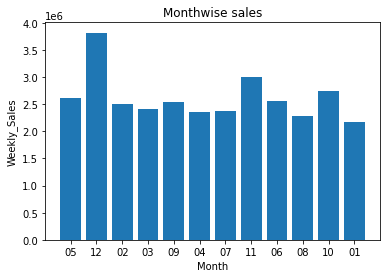

In [28]:
plt.bar(data['Months'],data['Weekly_Sales'])
plt.xlabel('Month')
plt.ylabel('Weekly_Sales')
plt.title('Monthwise sales')



<AxesSubplot:ylabel='Frequency'>

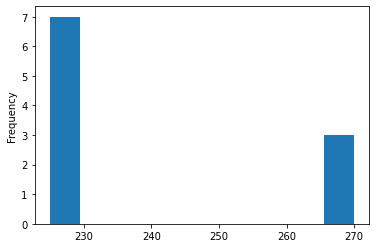

In [29]:
data['Day'].value_counts()[:10].plot(kind='hist')

In [30]:
data.index=pd.RangeIndex(start=1,stop=6436,step=1)
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Months,Day,Year
1,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,05,02,10
2,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,12,02,10
3,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,02,19,10
4,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,02,26,10
5,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,05,03,10
...,...,...,...,...,...,...,...,...,...,...,...
6431,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,09,28,12
6432,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,05,10,12
6433,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,12,10,12
6434,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,10,19,12


In [31]:
data_part=data[data['Store']==1]
data_part

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Months,Day,Year
1,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,05,02,10
2,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,12,02,10
3,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,02,19,10
4,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,02,26,10
5,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,05,03,10
...,...,...,...,...,...,...,...,...,...,...,...
139,1,2012-09-28,1437059.26,0,76.08,3.666,222.981658,6.908,09,28,12
140,1,2012-05-10,1670785.97,0,68.55,3.617,223.181477,6.573,05,10,12
141,1,2012-12-10,1573072.81,0,62.99,3.601,223.381296,6.573,12,10,12
142,1,2012-10-19,1508068.77,0,67.97,3.594,223.425723,6.573,10,19,12


In [32]:
x=data_part[['Store','CPI','Unemployment','Day','Months','Year']]

X=data_part[['Store','CPI','Unemployment','Day','Months','Year','Weekly_Sales']]
#df=[{'Store':1,'CPI':223,'Unemployment':11,'Fuel_Price':5.9}]
#x=x.append(df)


In [33]:
y=data_part['Weekly_Sales']
Y=data_part['Holiday_Flag']
y.head()
#df1=[{'Store':1,'Weekly_Sales':1645232.22}]
#y=y.append(df1)

1    1643690.90
2    1641957.44
3    1611968.17
4    1409727.59
5    1554806.68
Name: Weekly_Sales, dtype: float64

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 0)
x_train.shape,y_train.shape

((114, 6), (114,))

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state = 0)
X_train.shape,Y_train.shape

((114, 7), (114,))

In [36]:
from sklearn.linear_model import LinearRegression
sc=LinearRegression()
sc.fit(x_train,y_train)


LinearRegression()

In [37]:
pred=sc.predict(x_test)

In [38]:
pred

array([1546705.26697127, 1668701.10445977, 1427615.35339617,
       1544165.42012317, 1573357.04891571, 1448555.32543149,
       1614051.26165692, 1508366.12307374, 1597358.82483007,
       1524581.07240867, 1604250.95992181, 1592103.75204   ,
       1542018.27358506, 1679541.54227829, 1660220.80519283,
       1492464.04431375, 1578317.30111606, 1522253.37302981,
       1561329.46036225, 1475838.39073492, 1481734.07886227,
       1519437.07162968, 1546751.22489451, 1561662.41567057,
       1516005.85203333, 1602014.86331816, 1636576.55945427,
       1523529.56150459, 1564696.92170903])

In [39]:
print("Train Accuracy",sc.score(x_train,y_train)*100)

Train Accuracy 20.693668397188148


Mean Absolute Error: 104088.849
Mean Squared Error: 20706744113.811
Root Mean Squared Error: 143898.381


C:\Users\MONIKA\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weekly_Sales'>

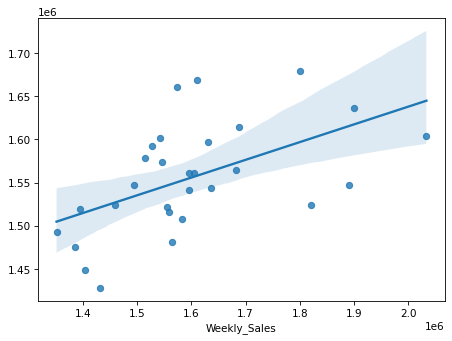

In [40]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('Mean Absolute Error:', mean_absolute_error(y_test, pred).round(3))
print('Mean Squared Error:', mean_squared_error(y_test, pred).round(3))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred)).round(3))

plt.figure(figsize=(7,5), dpi=75)
sns.regplot(y_test, pred)

In [41]:
from sklearn.ensemble import RandomForestRegressor
r1 = RandomForestRegressor()
r1.fit(x_train,y_train)

RandomForestRegressor()

Accuracy: 87.82600000000001
R2_Score: 46.861000000000004
Mean Absolute Error: 85356.03821724119
Mean Squared Error: 13551173909.47711
Root Mean Squared Error: 116409.50953198415


C:\Users\MONIKA\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weekly_Sales'>

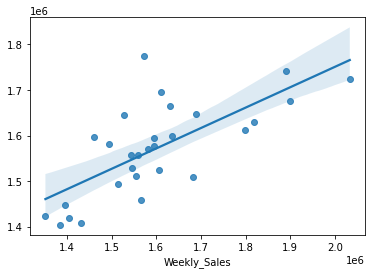

In [42]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
y_pred = r1.predict(x_test)
print("Accuracy:",r1.score(x_train,y_train).round(5)*100)
print("R2_Score:", r2_score(y_test, y_pred).round(5)*100)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, y_pred)))
sns.regplot(y_test,y_pred)

In [43]:
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Months,Day,Year
1,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,05,02,10
2,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,12,02,10
3,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,02,19,10
4,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,02,26,10
5,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,05,03,10
...,...,...,...,...,...,...,...,...,...,...,...
6431,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,09,28,12
6432,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,05,10,12
6433,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,12,10,12
6434,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,10,19,12


In [44]:
from sklearn.linear_model import LogisticRegression
s1=LogisticRegression()

In [45]:
s1.fit(X_train,Y_train)

LogisticRegression()

In [46]:
spred=s1.predict(X_test)

In [47]:
spred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0], dtype=int64)

Accuracy: 92.105
Mean Absolute Error: 0.034482758620689655
Mean Squared Error: 0.034482758620689655
Root Mean Squared Error: 0.18569533817705186


C:\Users\MONIKA\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Holiday_Flag'>

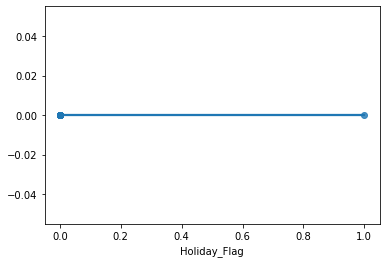

In [48]:
from sklearn.metrics import r2_score,mean_absolute_error
print("Accuracy:",s1.score(X_train,Y_train).round(5)*100)
print("Mean Absolute Error:", mean_absolute_error(Y_test, spred))
print("Mean Squared Error:", mean_squared_error(Y_test, spred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(Y_test, spred)))

sns.regplot(Y_test,spred)

In [49]:
data["Which day"]=pd.to_datetime(data["Date"]).dt.day_name()

In [50]:
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Months,Day,Year,Which day
1,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,05,02,10,Sunday
2,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,12,02,10,Thursday
3,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,02,19,10,Friday
4,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,02,26,10,Friday
5,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,05,03,10,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...
6431,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,09,28,12,Friday
6432,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,05,10,12,Thursday
6433,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,12,10,12,Monday
6434,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,10,19,12,Friday
